#### colab으로 시작하기
<a href="https://colab.research.google.com/github/LDJWJ/00_TOTO_MLDL_CLASS/blob/master/DL03_02_DROPOUT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 03 MNIST - DROPOUT 추가

### 학습 내용
* dropout 이해와 실습해 보기

### 01 Dropout(드롭아웃) 설명
 * 과적합의 이해 - 학습한 결과가 학습 데이터에는 매우 잘 맞지만, 학습 데이터에만 너무 꼭 맞춰져 있어, 그 외의 데이터에는 잘 맞지 않음.
 * 학습시 전체 신경망 중 일부만을 사용하도록 하는 것.
 * 즉, 학습 단계마다 일부 뉴런을 제거(사용하지 않도록)함으로써, 일부 특징이 특정 뉴런에 고정되는 것을 막아 가중치의 균형을 잡도록 한다.
 * 학습 시 일부 뉴런을 학습시키지 않기 때문에 신경망이 충분히 학습되기까지의 시간은 조금 더 오래 걸리는 편이다.

In [1]:
import IPython.display as display
from PIL import Image

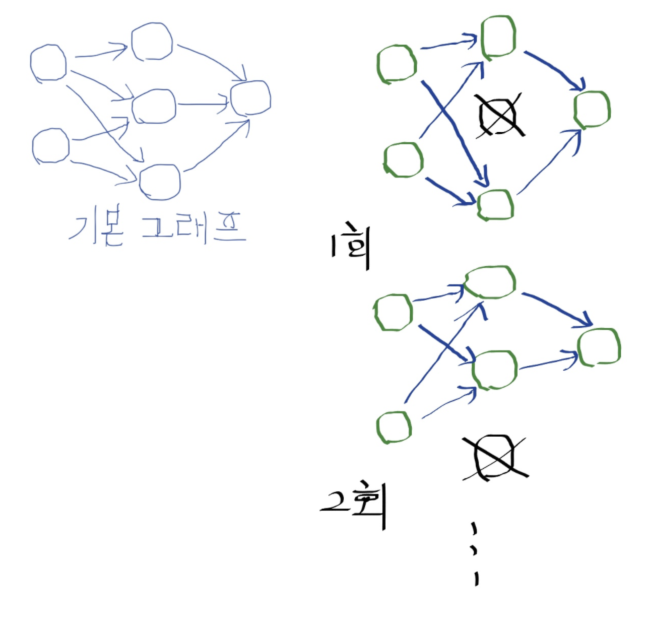

In [2]:
display.display(Image.open("../img/dropout1.png"))

In [17]:
import tensorflow as tf

In [18]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


### 01-02 신경망 모델 구성하기 
  * MNIST의 손글씨는 28 X 28로 구성되어 있다.
  * 784개의 특징으로 구성되어 있음.
  * 레이블은 0~9까지의 10개의 분류

### Placeholder 

In [19]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

### 미니배치의 이해
 * 이미지를 하나씩 학습시키는 것보다 여러 개를 한꺼번에 학습시키는 쪽이 효과가 좋다.
 * 많은 메모리와 높은 컴퓨터 성능이 필요하므로 일반적으로 데이터를 적당한 크기로 잘라서 학습시킨다.
  * **미니배치**라고 한다.
 * tf.float32, [None, 784] => None의 자리에는 한번에 학습시킬 이미지의 개수를 지정하는 값이 들어감., 즉 배치 크기를 지정하는 자리이다.

### 신경망의 구성
```
 * 입력층 - 784(입력, 특징 개수) -> 
     256(첫번째 은닉층 뉴런) -> 
     256(두번째 은닉층 뉴런)
             출력층 -> 10(결과값 0~9 분류 개수 )
```

### DROPOUT 적용
 * tf.nn.dropout(Layer, 비율)

In [20]:
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)   # dropout

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)   # 뒤의 뉴런을 0.8만 이용 (학습시 해당 계층의 80%만 이용)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

print(W3)
print(model)

<tf.Variable 'Variable_6:0' shape=(256, 10) dtype=float32_ref>
Tensor("MatMul_5:0", shape=(?, 10), dtype=float32)


### 비용함수, 최적화 함수 지정

In [21]:
# old 버전 : cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, 
                                                                 labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

### 세션 생성 및 초기화

In [22]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

### 배치 사이즈 지정

In [23]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

### 학습

In [24]:
# MNIST 데이터 전체를 학습하는 일을 15번 반복함.
# 학습 데이터 전체를 한 바퀴를 도는 일을 에포크(epoch)라 한다.
for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        # 배치 사이즈만큼 데이터 가져오기 
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # 입력값 : batch_xs, 출력값 : batch_ys
        # 최적화를 수행 후, 손실을 구한다.
        _, cost_val = sess.run([optimizer, cost], 
                      feed_dict={X:batch_xs, Y:batch_ys,
                                keep_prob:0.8})

        # 총 손실 계산
        total_cost = total_cost + cost_val

    print("Epoch : ", "%4d" %(epoch + 1), 
                '평균 Cost = ', "{:.3f}".format(total_cost/total_batch))
    
print("최적화 완료!")

Epoch :     1 평균 Cost =  0.425
Epoch :     2 평균 Cost =  0.161
Epoch :     3 평균 Cost =  0.116
Epoch :     4 평균 Cost =  0.088
Epoch :     5 평균 Cost =  0.072
Epoch :     6 평균 Cost =  0.060
Epoch :     7 평균 Cost =  0.052
Epoch :     8 평균 Cost =  0.045
Epoch :     9 평균 Cost =  0.039
Epoch :    10 평균 Cost =  0.035
Epoch :    11 평균 Cost =  0.035
Epoch :    12 평균 Cost =  0.031
Epoch :    13 평균 Cost =  0.029
Epoch :    14 평균 Cost =  0.028
Epoch :    15 평균 Cost =  0.026
최적화 완료!


### 정확도 확인

In [25]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
is_correct

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도 :', sess.run(accuracy, 
                       feed_dict = {X:mnist.test.images,
                                    Y:mnist.test.labels,
                                    keep_prob: 0.8}))

정확도 : 0.9753


### 과적합을 막아주는 기법으로 가장 유명한 것 (드롭아웃)
### 다른 과적합 방지 방법
* 배치 정규화(Batch Normalization) : 과적합 방지 및 학습 속도 향상.
* tf.nn.batch_normalization
* tf.layers.batch_normalization

In [26]:
labels = sess.run(model, 
                  feed_dict = {X:mnist.test.images,
                                    Y:mnist.test.labels,
                                    keep_prob: 0.8})
labels.shape

(10000, 10)

In [29]:
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline   # 필요.

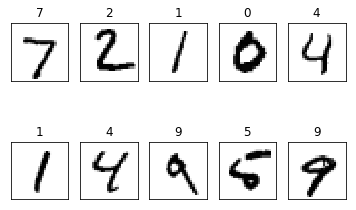

In [30]:
fig = plt.figure()

for i in range(10):
    subplot = fig.add_subplot(2,5, i+1)
    
    # 이미지 깨끗하게 출력, x,y의 눈금 출력 안함.
    subplot.set_xticks([])
    subplot.set_yticks([])
    
    subplot.set_title('{}'.format(np.argmax(labels[i])))
    subplot.imshow(mnist.test.images[i].reshape((28,28)),
                   cmap=plt.cm.gray_r)
plt.show()

### 더 알아보기
* 과적합을 막아주는 기법으로 가장 유명한 것이 쉽게 이해 가능한 것은 드롭아웃이다.
* 최근에는 배치 정규화(Batch Normalization)라는 기법이 많이 이용됨.
* 과적합을 막고, 학습 속도도 향상시켜주는 장점이 있다.
* 등장 배경은 학습 시 발산이나 소실 등을 방지하여 학습 속도를 높이기 위한 방법이다.
* tf.nn.batch_normalization과 tf.layers.batch_normalization 함수로 쉽게 적용 가능.